# The KS test for DeepFactor model

## imports

In [2]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import yaml
from IPython.display import display


In [3]:
from src.RQ1_forecast import *

In [4]:
pd.options.display.max_columns = None

In [5]:
def first_horizon_ks(data_address_val, num_time_series, train_series_number_ks, prediction_length, dataset_name):
    # read the forcast file
    print('reading the experiemtns')
    forcast_list1_val = read_csv_result('forecasts.csv', data_address_val)
    # sort the forcast lists based on their original time series
    print('sorting the experiments')
    sorted_forcast_list1_val = get_sorted_csv(forcast_list1_val, num_time_series=num_time_series)
    target_forcast_series_val = get_forcast_target(forcast_list1_val)
    sample_forcast_list1_val = get_forcast_samples(forcast_list1_val)
    
    # initialize the numpy array
    ks_array = np.zeros((train_series_number_ks, prediction_length))

    # we want to calculate the ks test for the first prediction
    # i from 0 to #ts-1:
    #   j from 168*i to 168*i+24:
    print('calculating the ks test')
    for i in range(train_series_number_ks):
        for j, data_point in enumerate(range(168*i, 168*i+24)):
            ks_table = get_ks_tmp(sample_forcast_list1_val, data_point)  
            ks_array[i,j] = portion_ks_table(ks_table)
        print(f'ts {i}')

    print(f'Mean of {dataset_name} is ={ks_array.mean()}')
    print('\n---------------------------------------------\n')
    return ks_array

def first_horizon_ks_exchange(data_address_val, num_time_series, train_series_number_ks, prediction_length, dataset_name):
    # read the forcast file
    print('reading the experiemtns')
    forcast_list1_val = read_csv_result('forecasts.csv', data_address_val)
    # sort the forcast lists based on their original time series
    print('sorting the experiments')
    sorted_forcast_list1_val = get_sorted_csv(forcast_list1_val, num_time_series=num_time_series)
    target_forcast_series_val = get_forcast_target(forcast_list1_val)
    sample_forcast_list1_val = get_forcast_samples(forcast_list1_val)
    
    # initialize the numpy array
    ks_array = np.zeros((train_series_number_ks, prediction_length))

    # we want to calculate the ks test for the first prediction
    # i from 0 to #ts-1:
    #   j from 168*i to 168*i+24:
    print('calculating the ks test')
    for i in range(train_series_number_ks):
        for j, data_point in enumerate(range(i*30, i*30+30)):
            ks_table = get_ks_tmp(sample_forcast_list1_val, data_point)  
            ks_array[i,j] = portion_ks_table(ks_table)
        print(f'ts {i}')

    print(f'Mean of {dataset_name} is ={ks_array.mean()}')
    print('\n---------------------------------------------\n')
    return ks_array

In [6]:
with open(f'/home/dev/deepts/configs/ks_config_factor.yaml', "r") as f:
            config = yaml.load(f, Loader=yaml.FullLoader)
model_name = 'factor'


# Electricity

0it [00:00, ?it/s]reading the experiemtns
101it [00:00, 201.51it/s]
100%|###########| 100/100 [05:19<00:00,  3.20s/it]
sorting the experiments
calculating the ks test
ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
ts 40
ts 41
ts 42
ts 43
ts 44
ts 45
ts 46
ts 47
ts 48
ts 49
ts 50
ts 51
ts 52
ts 53
ts 54
ts 55
ts 56
ts 57
ts 58
ts 59
ts 60
ts 61
ts 62
ts 63
ts 64
ts 65
ts 66
ts 67
ts 68
ts 69
ts 70
ts 71
ts 72
ts 73
ts 74
ts 75
ts 76
ts 77
ts 78
ts 79
ts 80
ts 81
ts 82
ts 83
ts 84
ts 85
ts 86
ts 87
ts 88
ts 89
ts 90
ts 91
ts 92
ts 93
ts 94
ts 95
ts 96
ts 97
ts 98
ts 99
Mean of deep_factor_electricity_both_ep100 is =0.023251767676767673

---------------------------------------------



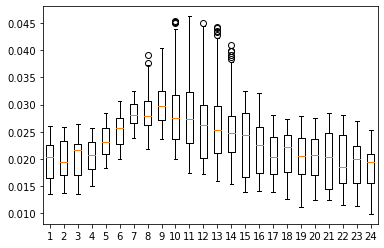

In [6]:
model_name = config['model_name']
dataset_name = "electricity_both_ep100" 
if config[dataset_name] is not None:
    ks_array_electricity = first_horizon_ks(data_address_val=config[dataset_name], num_time_series=321, train_series_number_ks=100, prediction_length=24, dataset_name=f'{model_name}_{dataset_name}')
    plt.boxplot(ks_array_electricity)
    plt.savefig(f'/home/dev/deepts/plots/ks_{model_name}_{dataset_name}')


In [7]:
print(f'the mean is {ks_array_electricity.mean()}')

the mean is 0.023251767676767673


In [8]:
pd.DataFrame({'mean' : ks_array_electricity.mean(axis=0),'std' :ks_array_electricity.std(axis=0)}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
mean,0.019733,0.019915,0.020499,0.020549,0.023170,0.025378,0.028251,0.028782,0.030398,0.029248,0.028677,0.027026,0.026855,0.025663,0.023198,0.022069,0.020693,0.020861,0.019994,0.020143,0.019996,0.019477,0.019246,0.018222
std,0.003435,0.003488,0.003373,0.002834,0.002815,0.002737,0.002246,0.003812,0.004385,0.006869,0.007224,0.007418,0.007627,0.006447,0.006047,0.004890,0.004082,0.004106,0.004374,0.004096,0.004872,0.004577,0.004315,0.003643


# Solar_nips

101it [00:00, 27066.94it/s]
100%|###########| 100/100 [00:29<00:00,  3.43it/s]
sorting the experiments
calculating the ks test
ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
ts 40
ts 41
ts 42
ts 43
ts 44
ts 45
ts 46
ts 47
ts 48
ts 49
ts 50
ts 51
ts 52
ts 53
ts 54
ts 55
ts 56
ts 57
ts 58
ts 59
ts 60
ts 61
ts 62
ts 63
ts 64
ts 65
ts 66
ts 67
ts 68
ts 69
ts 70
ts 71
ts 72
ts 73
ts 74
ts 75
ts 76
ts 77
ts 78
ts 79
ts 80
ts 81
ts 82
ts 83
ts 84
ts 85
ts 86
ts 87
ts 88
ts 89
ts 90
ts 91
ts 92
ts 93
ts 94
ts 95
ts 96
ts 97
ts 98
ts 99
Mean of factor_solar_nips_both_ep100 is =0.39869116161616164

---------------------------------------------



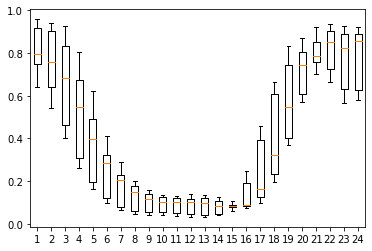

In [7]:
dataset_name = 'solar_nips_both_ep100'
if config[dataset_name] is not None:
    ks_array_solar = first_horizon_ks(data_address_val=config[dataset_name], num_time_series=137, train_series_number_ks=100, prediction_length=24, dataset_name=f'{model_name}_{dataset_name}')
    plt.boxplot(ks_array_solar)
    plt.savefig(f'/home/dev/deepts/plots/ks_{model_name}_{dataset_name}')



In [8]:
print(f'the mean is {ks_array_solar.mean()}')

the mean is 0.39869116161616164


In [9]:
pd.DataFrame({'mean' : ks_array_solar.mean(axis=0),'std' :ks_array_solar.std(axis=0)}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
mean,0.825982,0.772602,0.668198,0.521877,0.371624,0.249723,0.176471,0.129806,0.102622,0.092341,0.089432,0.087814,0.087008,0.079840,0.082208,0.126202,0.230483,0.389994,0.575651,0.716832,0.804309,0.821984,0.778511,0.787073
std,0.097079,0.136773,0.177415,0.178576,0.150086,0.105772,0.076946,0.056235,0.040686,0.033553,0.034003,0.034957,0.037993,0.027137,0.010339,0.059809,0.128759,0.176030,0.159039,0.096109,0.056710,0.089214,0.127395,0.128257


# Exchange rate

101it [00:00, 27927.00it/s]
100%|###########| 100/100 [00:01<00:00, 54.26it/s]
sorting the experiments
calculating the ks test
ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
Mean of factor_exchange_rate_both_ep100 is =0.9555852272727273

---------------------------------------------



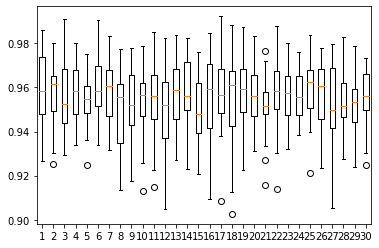

In [10]:
dataset_name = "exchange_rate_both_ep100"
if config[dataset_name] is not None:
    ks_array_exchange = first_horizon_ks_exchange(data_address_val=config[dataset_name], num_time_series=8, train_series_number_ks=32, prediction_length=30, dataset_name=f'{model_name}_{dataset_name}')
    plt.boxplot(ks_array_exchange)
    plt.savefig(f'/home/dev/deepts/plots/ks_{model_name}_{dataset_name}')

In [11]:
print(f'the mean is {ks_array_exchange.mean()}')

the mean is 0.9555852272727273


In [12]:
pd.DataFrame({'mean' : ks_array_exchange.mean(axis=0),'std' :ks_array_exchange.std(axis=0)}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
mean,0.958384,0.957727,0.955259,0.957551,0.953870,0.961042,0.958479,0.951389,0.952658,0.954249,0.956894,0.950492,0.958914,0.957759,0.950240,0.956749,0.957462,0.95423,0.957229,0.957317,0.952437,0.956881,0.956692,0.956793,0.958977,0.956010,0.952519,0.953100,0.951667,0.954590
std,0.016560,0.012897,0.016242,0.012382,0.011159,0.013466,0.013549,0.016888,0.014959,0.015106,0.016398,0.017677,0.014784,0.015151,0.014702,0.018554,0.015687,0.01970,0.014885,0.013225,0.012612,0.015512,0.012123,0.010833,0.013574,0.015484,0.016610,0.014236,0.012546,0.012634


# Traffic_nips

101it [00:00, 31347.10it/s]
100%|###########| 100/100 [02:42<00:00,  1.62s/it]
sorting the experiments
calculating the ks test
ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
ts 40
ts 41
ts 42
ts 43
ts 44
ts 45
ts 46
ts 47
ts 48
ts 49
ts 50
ts 51
ts 52
ts 53
ts 54
ts 55
ts 56
ts 57
ts 58
ts 59
ts 60
ts 61
ts 62
ts 63
ts 64
ts 65
ts 66
ts 67
ts 68
ts 69
ts 70
ts 71
ts 72
ts 73
ts 74
ts 75
ts 76
ts 77
ts 78
ts 79
ts 80
ts 81
ts 82
ts 83
ts 84
ts 85
ts 86
ts 87
ts 88
ts 89
ts 90
ts 91
ts 92
ts 93
ts 94
ts 95
ts 96
ts 97
ts 98
ts 99
Mean of factor_traffic_nips_both_ep100 is =0.3094907407407408

---------------------------------------------



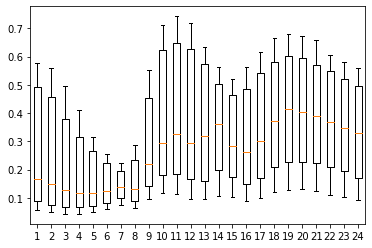

In [13]:
dataset_name = 'traffic_nips_both_ep100'
if config[dataset_name] is not None:
    ks_array_traffic = first_horizon_ks(data_address_val=config[dataset_name], num_time_series=963, train_series_number_ks=100, prediction_length=24, dataset_name=f'{model_name}_{dataset_name}')
    plt.boxplot(ks_array_traffic)
    plt.savefig(f'/home/dev/deepts/plots/ks_{model_name}_{dataset_name}')

In [14]:
print(f'the mean is {ks_array_traffic.mean()}')

the mean is 0.3094907407407408


In [15]:
pd.DataFrame({'mean' : ks_array_traffic.mean(axis=0),'std' :ks_array_traffic.std(axis=0)}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
mean,0.268095,0.247174,0.215206,0.183792,0.159497,0.145145,0.145614,0.161182,0.289212,0.384162,0.401382,0.383259,0.368004,0.358713,0.313873,0.311285,0.353315,0.402368,0.424093,0.420188,0.405432,0.382277,0.361212,0.343299
std,0.188792,0.179927,0.155735,0.125105,0.092935,0.066116,0.046325,0.073866,0.153860,0.209471,0.221467,0.218715,0.197520,0.159407,0.144318,0.161545,0.181121,0.191022,0.193559,0.189235,0.183690,0.175249,0.167546,0.167420
